<a href="https://colab.research.google.com/github/chhavic4004/-gdi2019-/blob/main/visualisation_of_gdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [3]:
# Load the GDI dataset
df = pd.read_csv('GDI.csv')

In [4]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   HDI Rank                 Country GDI_Value GDI_Group HDI_Female HDI_Male  \
0       NaN                     NaN      2019      2019       2019     2019   
1       1.0                  Norway     0.990         1      0.949    0.959   
2       2.0                 Ireland     0.981         1      0.943    0.961   
3       2.0             Switzerland     0.968         2      0.934    0.965   
4       4.0  Hong Kong, China (SAR)     0.972         2      0.933    0.959   

  Lif_Expec_Female Lif_Excep_Male Excep_Yrs_Schooling_Female  \
0             2019           2019                       2019   
1             84.4           80.4                       18.8   
2             83.9           80.7                       18.8   
3             85.6           81.9                       16.2   
4             87.7           82.0                       17.1   

  Excep_Yrs_Schooling_Male Mean_Yrs_Schooling_Female Mean_Yrs_Schooling_Male  \
0                     2019     

Basic Statistics:
         HDI Rank   GDI_Value  HDI_Female    HDI_Male  Lif_Expec_Female  \
count  189.000000  167.000000  167.000000  167.000000        183.000000   
mean    94.783069    0.938994    0.702683    0.742186         74.979235   
std     54.754486    0.074559    0.165867    0.143194          7.700650   
min      1.000000    0.488000    0.270000    0.432000         55.500000   
25%     48.000000    0.908500    0.577000    0.621500         69.350000   
50%     95.000000    0.965000    0.730000    0.760000         76.800000   
75%    142.000000    0.986000    0.831500    0.848500         80.550000   
max    189.000000    1.036000    0.949000    0.965000         87.700000   

       Lif_Excep_Male  Excep_Yrs_Schooling_Female  Excep_Yrs_Schooling_Male  \
count      183.000000                  180.000000                180.000000   
mean        70.172131                   13.498889                 13.281111   
std          7.305849                    3.363690                  2.

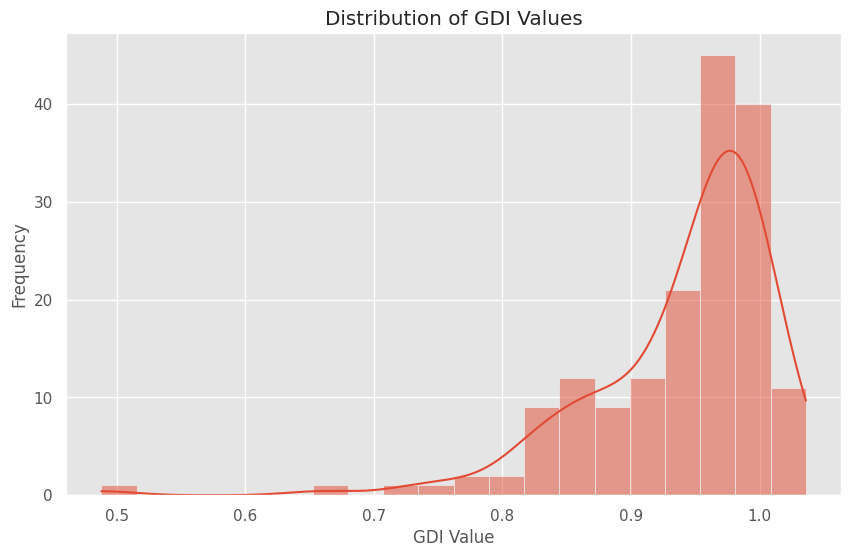

/tmp/ipython-input-5-2811494336.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDI_Value', y='Country', data=top_countries, palette='viridis')
/tmp/ipython-input-5-2811494336.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDI_Value', y='Country', data=bottom_countries, palette='viridis')


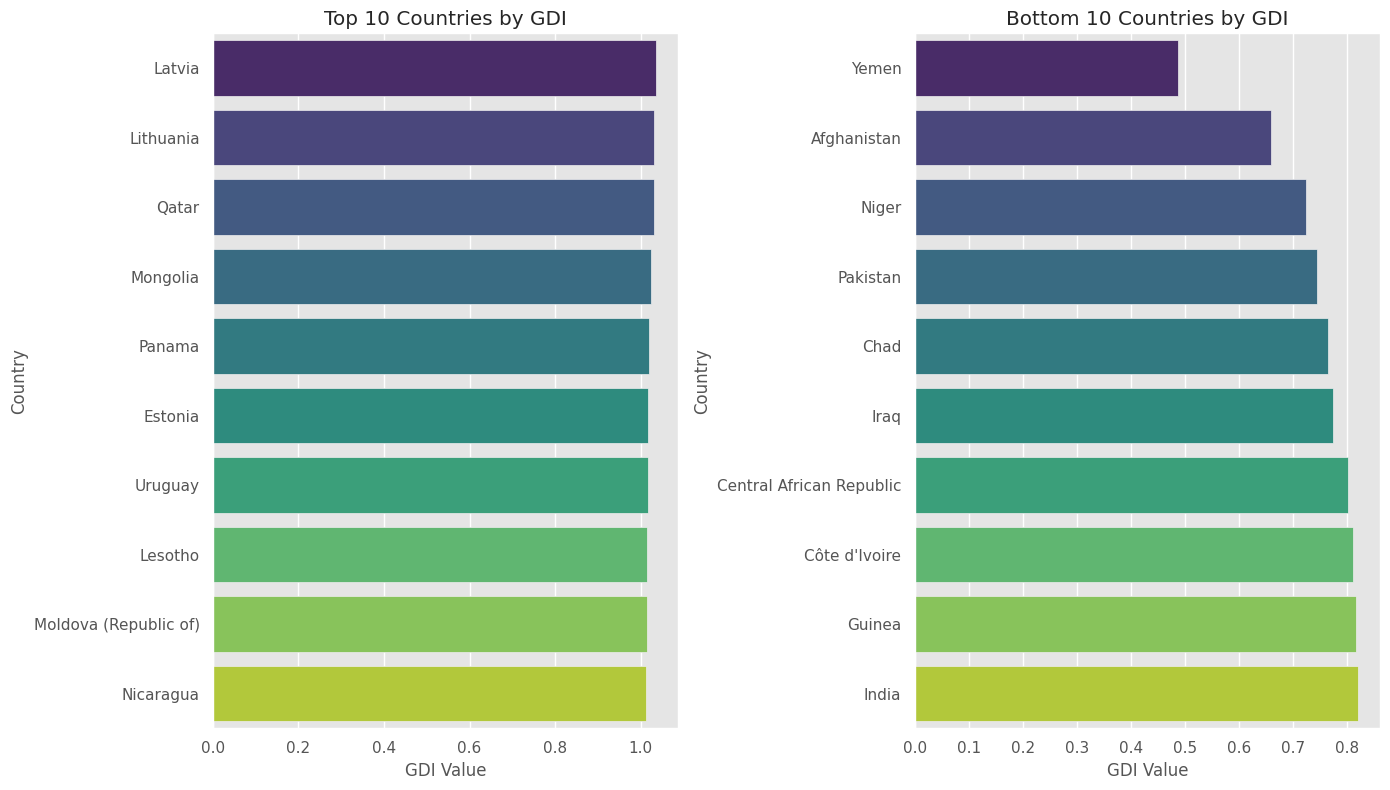

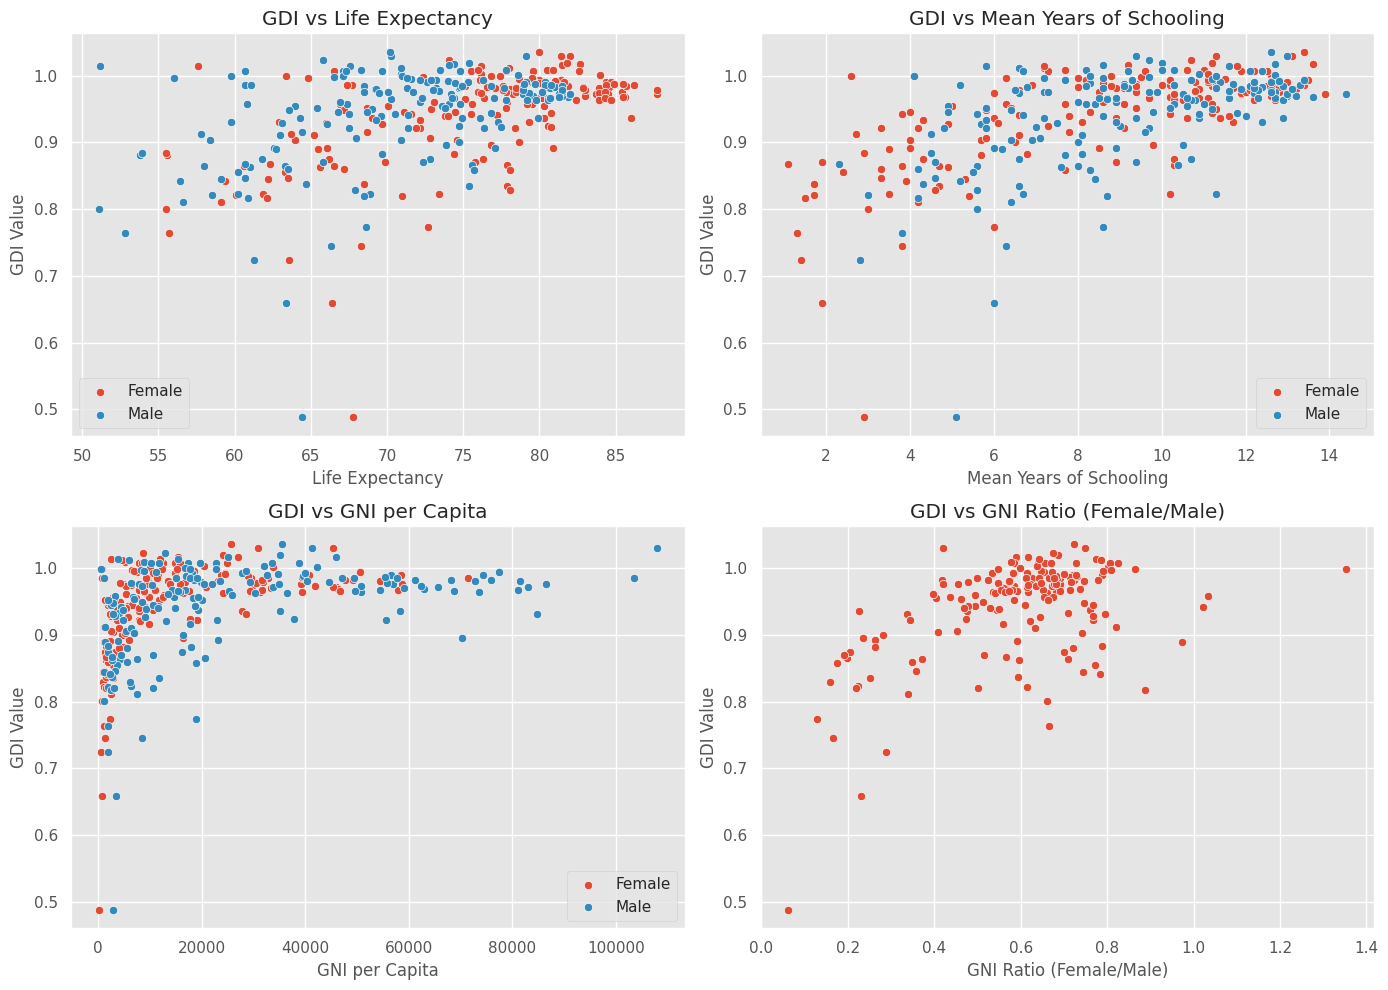

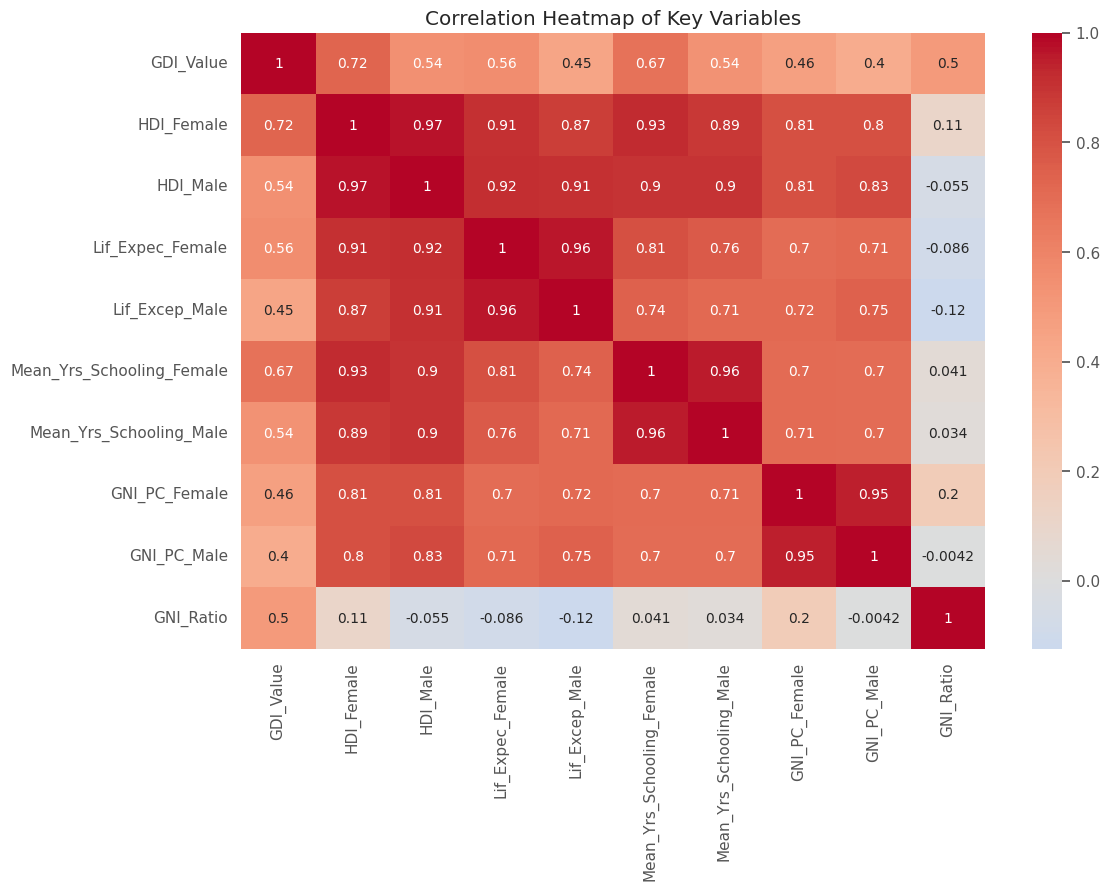

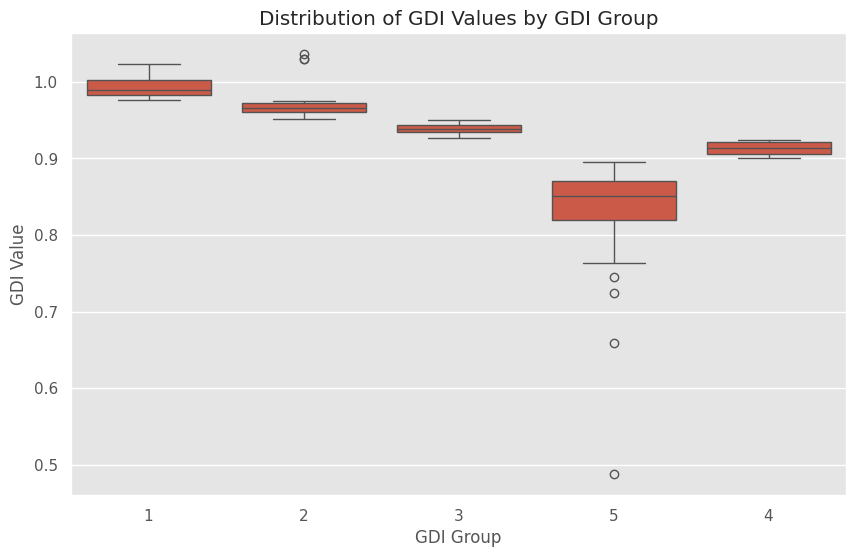

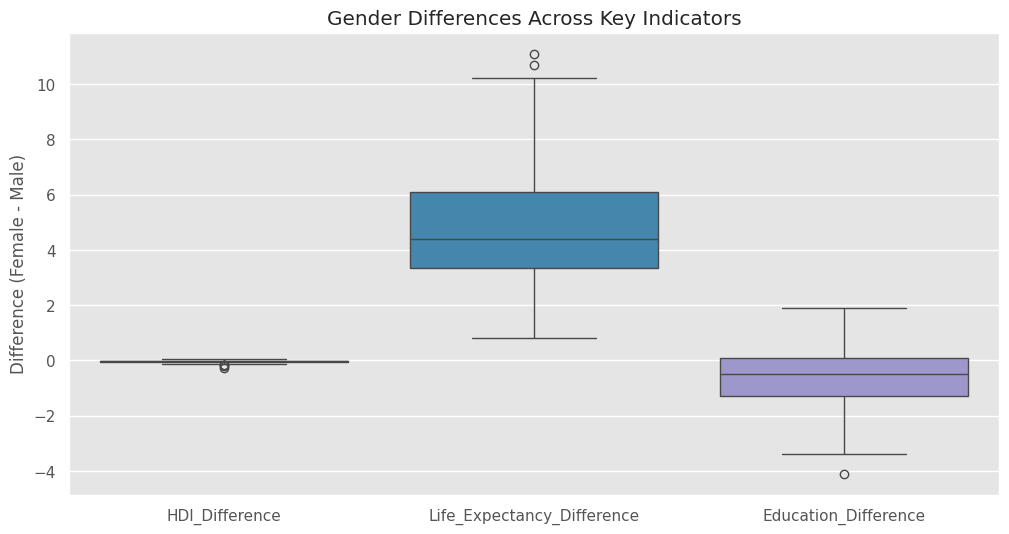

<Figure size 1400x800 with 0 Axes>

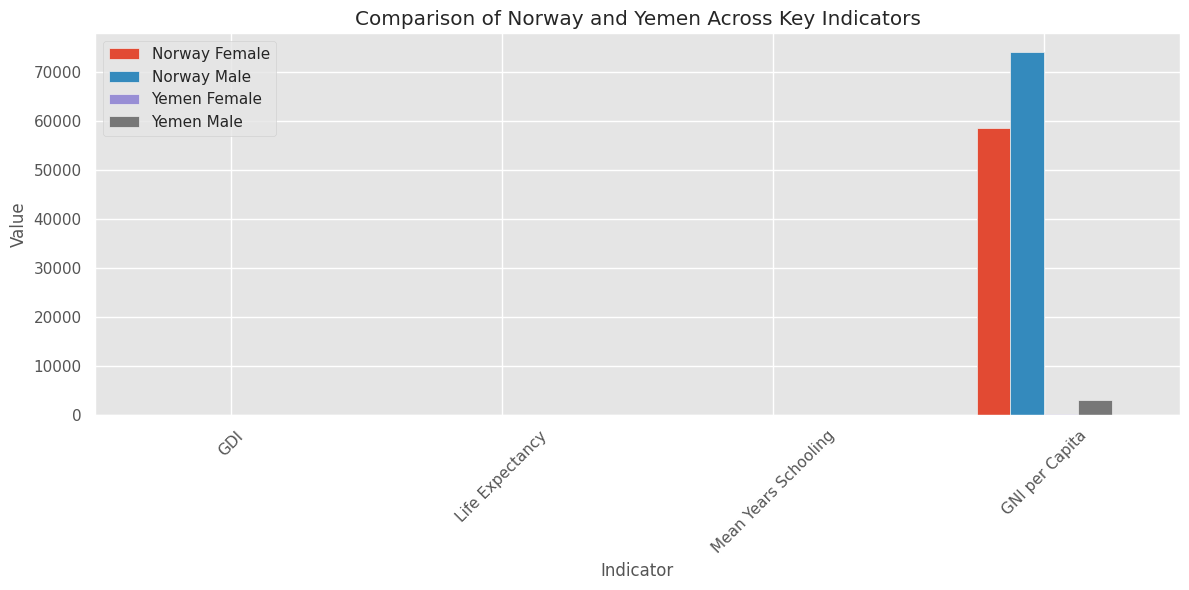

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
df = pd.read_csv('GDI.csv', skiprows=[1])  # Skip the second row which contains years

# Data Preprocessing
# Clean column names
df.columns = df.columns.str.strip()

# Handle missing values represented by '..'
df.replace('..', np.nan, inplace=True)

# Convert numerical columns to appropriate data types
numeric_cols = ['GDI_Value', 'HDI_Female', 'HDI_Male', 'Lif_Expec_Female', 'Lif_Excep_Male',
                'Excep_Yrs_Schooling_Female', 'Excep_Yrs_Schooling_Male',
                'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Clean GNI columns (remove commas and convert to float)
df['GNI_PC_Female'] = df['GNI_PC_Female'].str.replace(',', '').astype(float)
df['GNI_PC_Male'] = df['GNI_PC_Male'].str.replace(',', '').astype(float)

# Create a new column for GNI ratio (Female/Male)
df['GNI_Ratio'] = df['GNI_PC_Female'] / df['GNI_PC_Male']

# EDA - Basic Statistics
print("Basic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Distribution of GDI Values
plt.figure(figsize=(10, 6))
sns.histplot(df['GDI_Value'].dropna(), bins=20, kde=True)
plt.title('Distribution of GDI Values')
plt.xlabel('GDI Value')
plt.ylabel('Frequency')
plt.show()

# Top and Bottom Countries by GDI
top_countries = df.sort_values('GDI_Value', ascending=False).head(10)
bottom_countries = df.sort_values('GDI_Value', ascending=True).head(10)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='GDI_Value', y='Country', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by GDI')
plt.xlabel('GDI Value')

plt.subplot(1, 2, 2)
sns.barplot(x='GDI_Value', y='Country', data=bottom_countries, palette='viridis')
plt.title('Bottom 10 Countries by GDI')
plt.xlabel('GDI Value')
plt.tight_layout()
plt.show()

# Relationship between GDI and other variables
plt.figure(figsize=(14, 10))

# GDI vs Life Expectancy
plt.subplot(2, 2, 1)
sns.scatterplot(x='Lif_Expec_Female', y='GDI_Value', data=df, label='Female')
sns.scatterplot(x='Lif_Excep_Male', y='GDI_Value', data=df, label='Male')
plt.title('GDI vs Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('GDI Value')
plt.legend()

# GDI vs Education
plt.subplot(2, 2, 2)
sns.scatterplot(x='Mean_Yrs_Schooling_Female', y='GDI_Value', data=df, label='Female')
sns.scatterplot(x='Mean_Yrs_Schooling_Male', y='GDI_Value', data=df, label='Male')
plt.title('GDI vs Mean Years of Schooling')
plt.xlabel('Mean Years of Schooling')
plt.ylabel('GDI Value')
plt.legend()

# GDI vs GNI
plt.subplot(2, 2, 3)
sns.scatterplot(x='GNI_PC_Female', y='GDI_Value', data=df, label='Female')
sns.scatterplot(x='GNI_PC_Male', y='GDI_Value', data=df, label='Male')
plt.title('GDI vs GNI per Capita')
plt.xlabel('GNI per Capita')
plt.ylabel('GDI Value')
plt.legend()

# GDI vs GNI Ratio
plt.subplot(2, 2, 4)
sns.scatterplot(x='GNI_Ratio', y='GDI_Value', data=df)
plt.title('GDI vs GNI Ratio (Female/Male)')
plt.xlabel('GNI Ratio (Female/Male)')
plt.ylabel('GDI Value')

plt.tight_layout()
plt.show()

# Correlation Heatmap
corr_cols = ['GDI_Value', 'HDI_Female', 'HDI_Male', 'Lif_Expec_Female', 'Lif_Excep_Male',
             'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male',
             'GNI_PC_Female', 'GNI_PC_Male', 'GNI_Ratio']

plt.figure(figsize=(12, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

# Boxplot of GDI by GDI Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='GDI_Group', y='GDI_Value', data=df)
plt.title('Distribution of GDI Values by GDI Group')
plt.xlabel('GDI Group')
plt.ylabel('GDI Value')
plt.show()

# Gender Differences Analysis
df['HDI_Difference'] = df['HDI_Female'] - df['HDI_Male']
df['Life_Expectancy_Difference'] = df['Lif_Expec_Female'] - df['Lif_Excep_Male']
df['Education_Difference'] = df['Mean_Yrs_Schooling_Female'] - df['Mean_Yrs_Schooling_Male']

gender_diff_cols = ['HDI_Difference', 'Life_Expectancy_Difference', 'Education_Difference']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[gender_diff_cols])
plt.title('Gender Differences Across Key Indicators')
plt.ylabel('Difference (Female - Male)')
plt.show()

# Country Comparison - Example for Norway and Yemen
norway = df[df['Country'] == 'Norway'].iloc[0]
yemen = df[df['Country'] == 'Yemen'].iloc[0]

comparison_df = pd.DataFrame({
    'Indicator': ['GDI', 'Life Expectancy', 'Mean Years Schooling', 'GNI per Capita'],
    'Norway Female': [norway['GDI_Value'], norway['Lif_Expec_Female'], norway['Mean_Yrs_Schooling_Female'], norway['GNI_PC_Female']],
    'Norway Male': [norway['GDI_Value'], norway['Lif_Excep_Male'], norway['Mean_Yrs_Schooling_Male'], norway['GNI_PC_Male']],
    'Yemen Female': [yemen['GDI_Value'], yemen['Lif_Expec_Female'], yemen['Mean_Yrs_Schooling_Female'], yemen['GNI_PC_Female']],
    'Yemen Male': [yemen['GDI_Value'], yemen['Lif_Excep_Male'], yemen['Mean_Yrs_Schooling_Male'], yemen['GNI_PC_Male']]
})

plt.figure(figsize=(14, 8))
comparison_df.set_index('Indicator').plot(kind='bar')
plt.title('Comparison of Norway and Yemen Across Key Indicators')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-1474592636.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Northern Europe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Country'].str.contains(country), 'Region'] = region
/tmp/ipython-input-8-1474592636.py:42: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['Country'].str.contains(country), 'Region'] = region


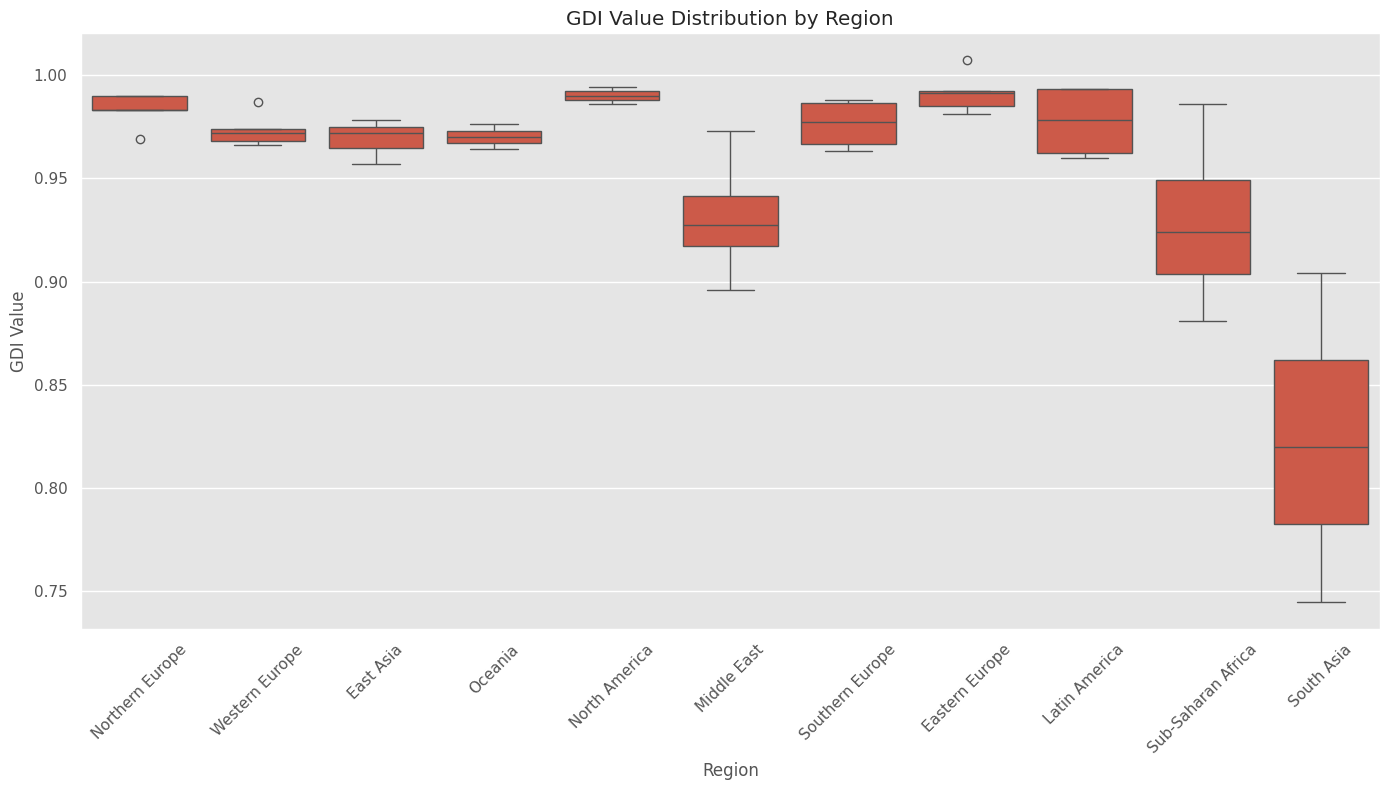

/tmp/ipython-input-8-1474592636.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_countries_by_region = regional_df.groupby('Region').apply(lambda x: x.nlargest(5, 'GDI_Value')).reset_index(drop=True)


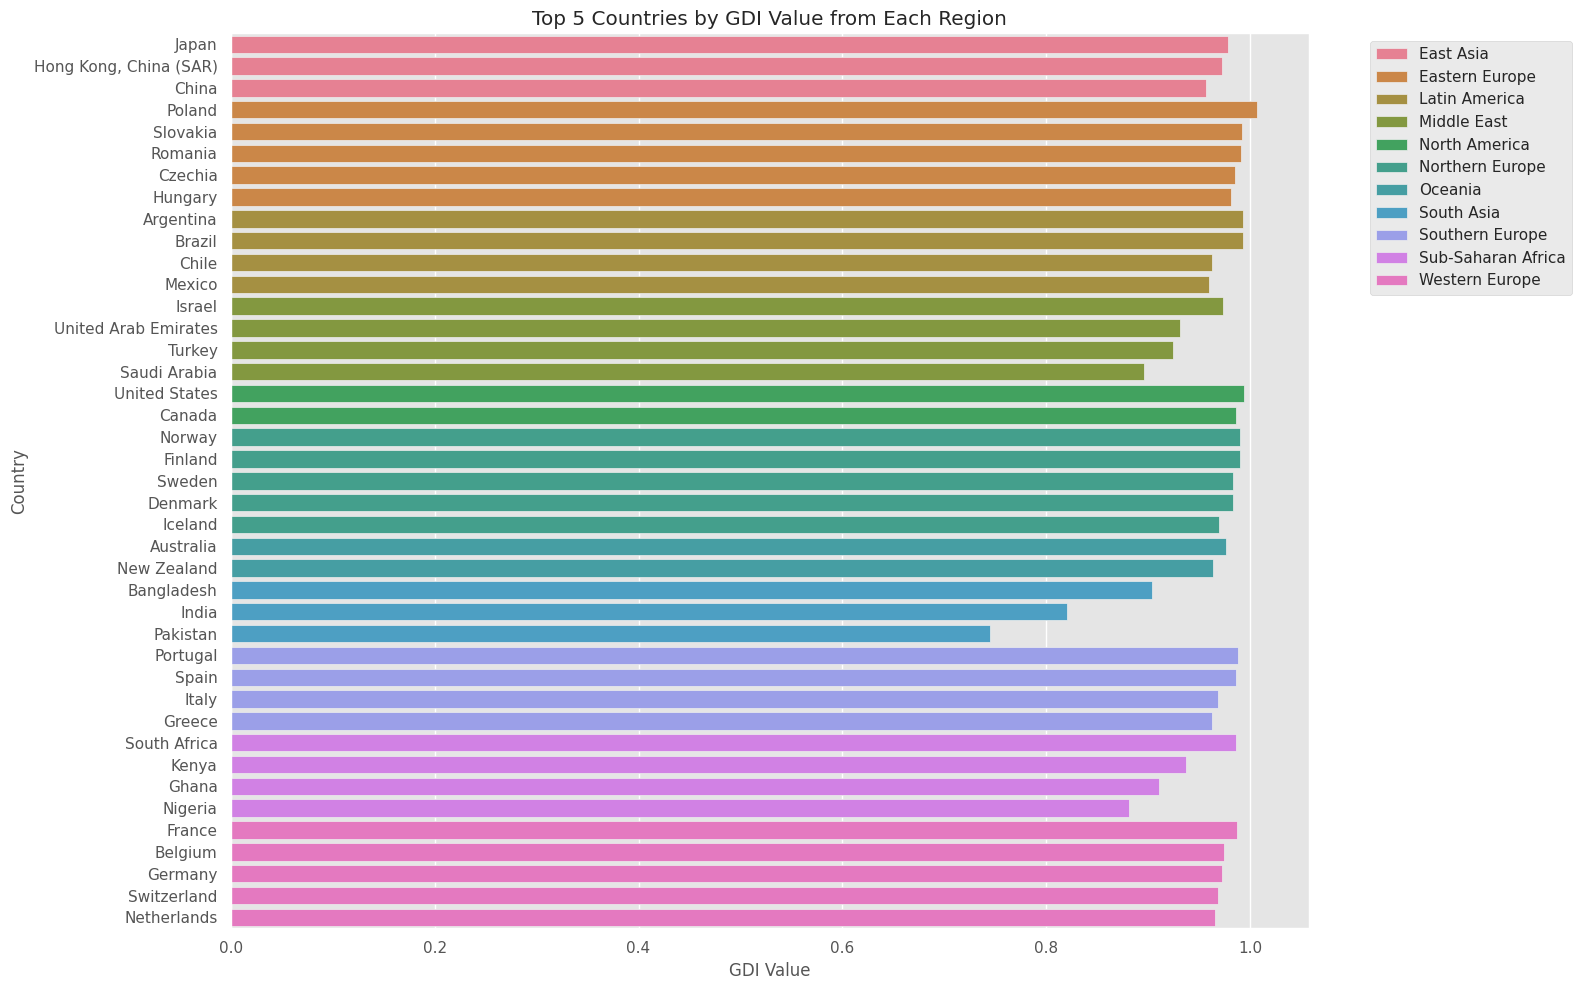

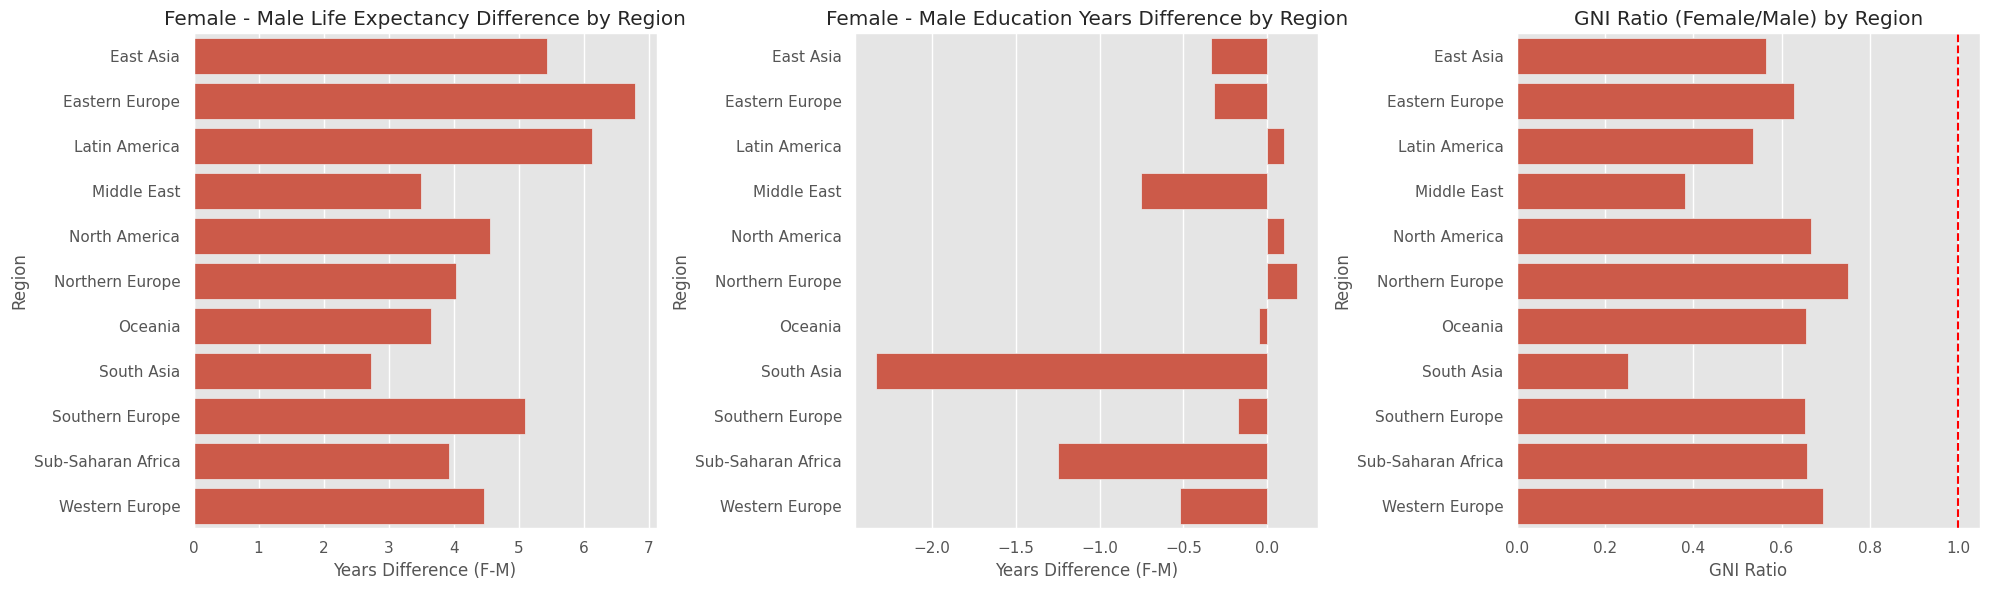

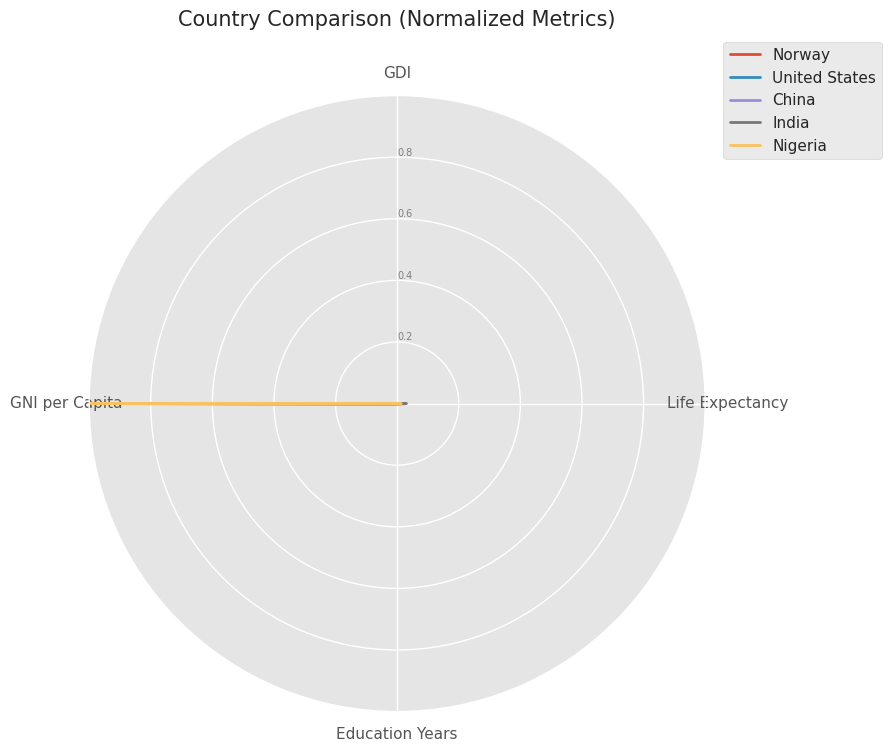

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect co

IndexError: cannot do a non-empty take from an empty axes.

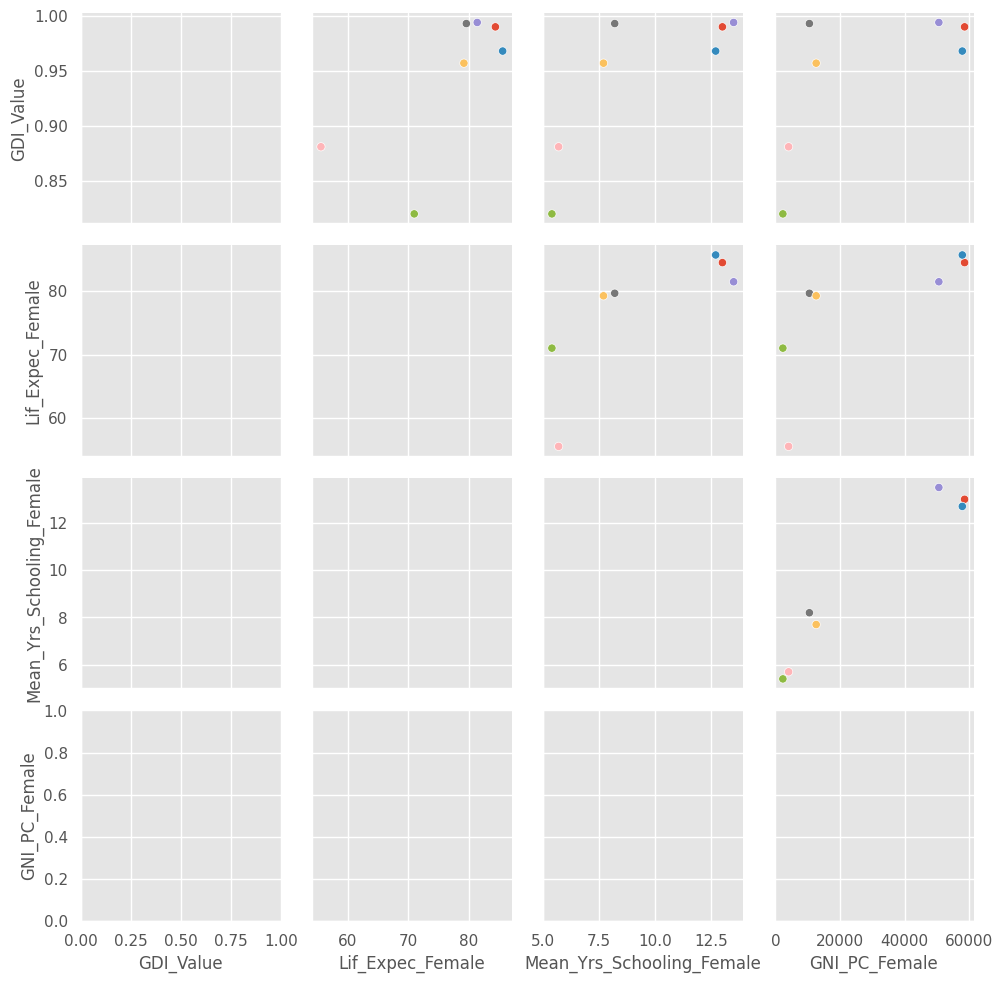

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data (same as before)
df = pd.read_csv('GDI.csv', skiprows=[1])
df.columns = df.columns.str.strip()
df.replace('..', np.nan, inplace=True)

# Convert numerical columns
numeric_cols = ['GDI_Value', 'HDI_Female', 'HDI_Male', 'Lif_Expec_Female', 'Lif_Excep_Male',
                'Excep_Yrs_Schooling_Female', 'Excep_Yrs_Schooling_Male',
                'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Clean GNI columns
df['GNI_PC_Female'] = df['GNI_PC_Female'].str.replace(',', '').astype(float)
df['GNI_PC_Male'] = df['GNI_PC_Male'].str.replace(',', '').astype(float)
df['GNI_Ratio'] = df['GNI_PC_Female'] / df['GNI_PC_Male']

# Define regions (simplified grouping)
regions = {
    'Northern Europe': ['Norway', 'Sweden', 'Finland', 'Denmark', 'Iceland'],
    'Western Europe': ['Switzerland', 'Germany', 'France', 'Netherlands', 'Belgium'],
    'Southern Europe': ['Italy', 'Spain', 'Portugal', 'Greece'],
    'Eastern Europe': ['Poland', 'Romania', 'Hungary', 'Czechia', 'Slovakia'],
    'North America': ['United States', 'Canada'],
    'Oceania': ['Australia', 'New Zealand'],
    'East Asia': ['Japan', 'Korea (Republic of)', 'China'],
    'Middle East': ['Saudi Arabia', 'United Arab Emirates', 'Israel', 'Turkey'],
    'Latin America': ['Brazil', 'Argentina', 'Mexico', 'Chile'],
    'South Asia': ['India', 'Pakistan', 'Bangladesh'],
    'Sub-Saharan Africa': ['South Africa', 'Nigeria', 'Kenya', 'Ghana']
}

# Create region column
df['Region'] = np.nan
for region, countries in regions.items():
    for country in countries:
        df.loc[df['Country'].str.contains(country), 'Region'] = region

# Drop rows without region (for this analysis)
regional_df = df.dropna(subset=['Region'])

# 1. GDI Comparison Across Regions
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='GDI_Value', data=regional_df)
plt.title('GDI Value Distribution by Region')
plt.xlabel('Region')
plt.ylabel('GDI Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top 5 Countries from Each Region
top_countries_by_region = regional_df.groupby('Region').apply(lambda x: x.nlargest(5, 'GDI_Value')).reset_index(drop=True)

plt.figure(figsize=(16, 10))
sns.barplot(x='GDI_Value', y='Country', hue='Region', data=top_countries_by_region, dodge=False)
plt.title('Top 5 Countries by GDI Value from Each Region')
plt.xlabel('GDI Value')
plt.ylabel('Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Gender Gaps Across Regions
regional_means = regional_df.groupby('Region')[['Lif_Expec_Female', 'Lif_Excep_Male',
                                             'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male',
                                             'GNI_PC_Female', 'GNI_PC_Male']].mean()

# Calculate differences
regional_means['Life_Exp_Diff'] = regional_means['Lif_Expec_Female'] - regional_means['Lif_Excep_Male']
regional_means['Education_Diff'] = regional_means['Mean_Yrs_Schooling_Female'] - regional_means['Mean_Yrs_Schooling_Male']
regional_means['GNI_Ratio'] = regional_means['GNI_PC_Female'] / regional_means['GNI_PC_Male']

# Plot gender gaps
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(x=regional_means['Life_Exp_Diff'], y=regional_means.index, ax=axes[0])
axes[0].set_title('Female - Male Life Expectancy Difference by Region')
axes[0].set_xlabel('Years Difference (F-M)')

sns.barplot(x=regional_means['Education_Diff'], y=regional_means.index, ax=axes[1])
axes[1].set_title('Female - Male Education Years Difference by Region')
axes[1].set_xlabel('Years Difference (F-M)')

sns.barplot(x=regional_means['GNI_Ratio'], y=regional_means.index, ax=axes[2])
axes[2].set_title('GNI Ratio (Female/Male) by Region')
axes[2].set_xlabel('GNI Ratio')
axes[2].axvline(x=1, color='red', linestyle='--')

plt.tight_layout()
plt.show()

# 4. Country Comparison: Radar Chart
def create_radar_chart(countries):
    categories = ['GDI_Value', 'Lif_Expec_Female', 'Mean_Yrs_Schooling_Female', 'GNI_PC_Female']
    labels = ['GDI', 'Life Expectancy', 'Education Years', 'GNI per Capita']

    # Normalize data (0-1 scale)
    norm_df = df[df['Country'].isin(countries)][['Country'] + categories].set_index('Country')
    norm_df = norm_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for idx, country in enumerate(countries):
        values = norm_df.loc[country].values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, linewidth=2, label=country)
        ax.fill(angles, values, alpha=0.25)

    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)

    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
    ax.set_ylim(0, 1)

    plt.title('Country Comparison (Normalized Metrics)', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Example comparison
create_radar_chart(['Norway', 'United States', 'China', 'India', 'Nigeria'])

# 5. Scatterplot Matrix for Selected Countries
selected_countries = ['Norway', 'Switzerland', 'United States', 'China', 'India', 'Nigeria', 'Brazil']
selected_df = df[df['Country'].isin(selected_countries)]

g = sns.PairGrid(selected_df,
                 vars=['GDI_Value', 'Lif_Expec_Female', 'Mean_Yrs_Schooling_Female', 'GNI_PC_Female'],
                 hue='Country', height=2.5)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
g.add_legend()
plt.suptitle('Scatterplot Matrix for Selected Countries', y=1.02)
plt.show()

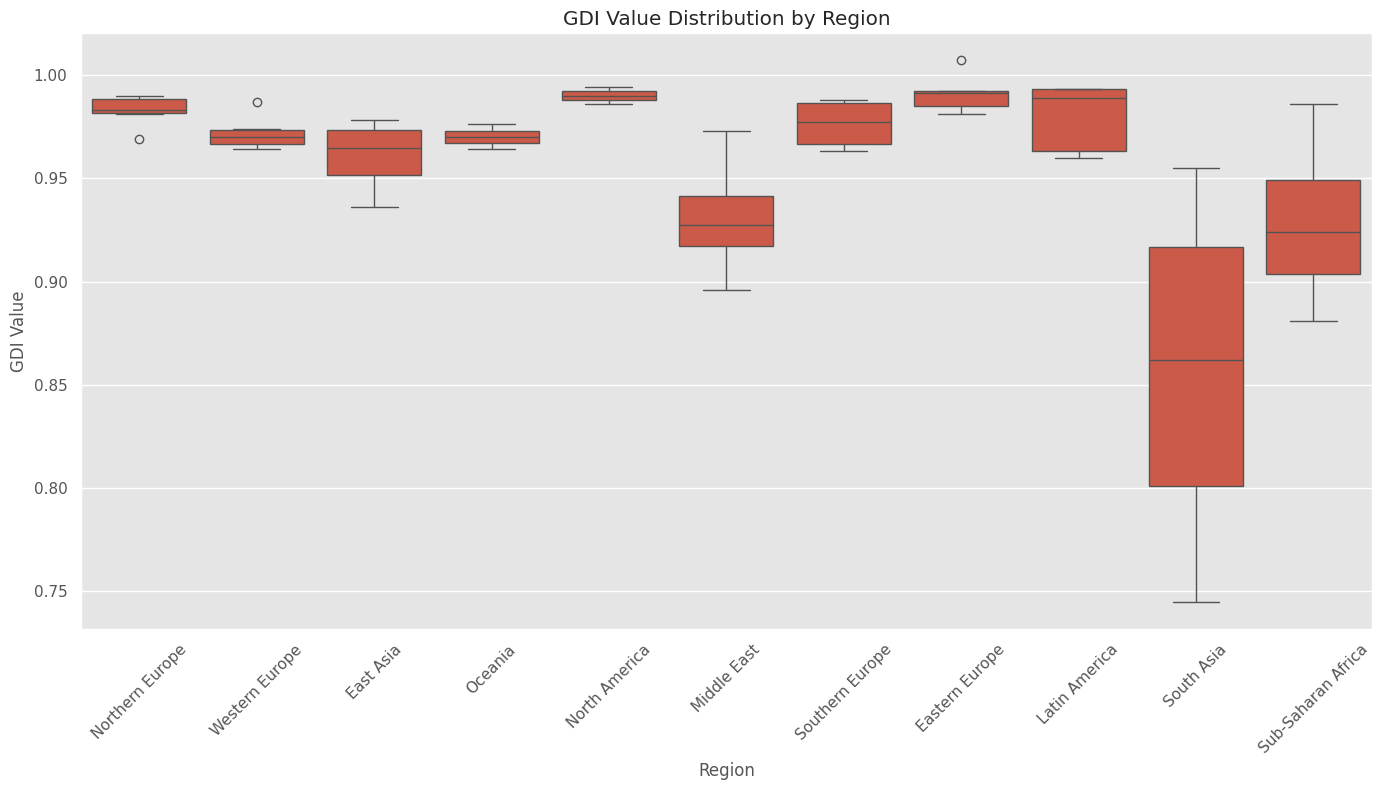

/tmp/ipython-input-9-3455806155.py:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_countries_by_region = regional_df.groupby('Region').apply(


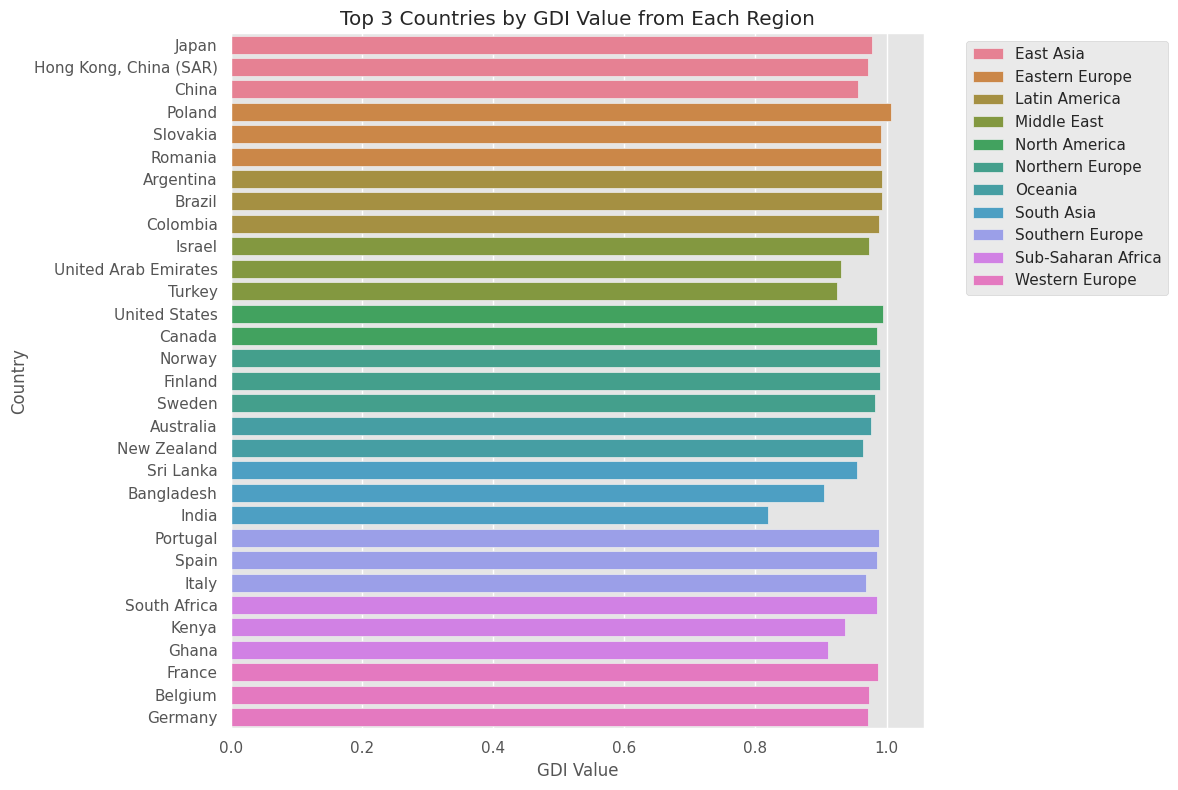

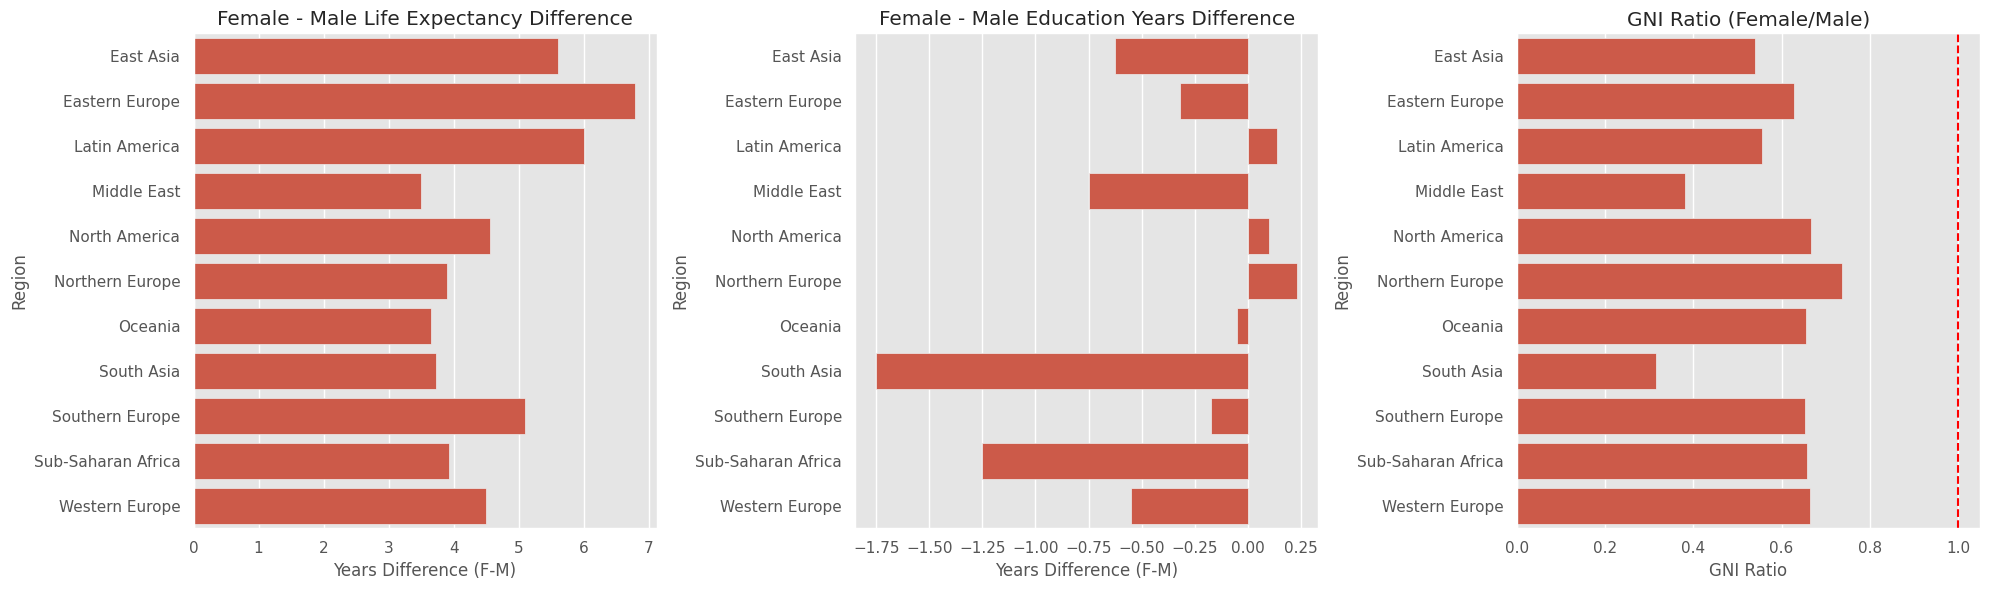

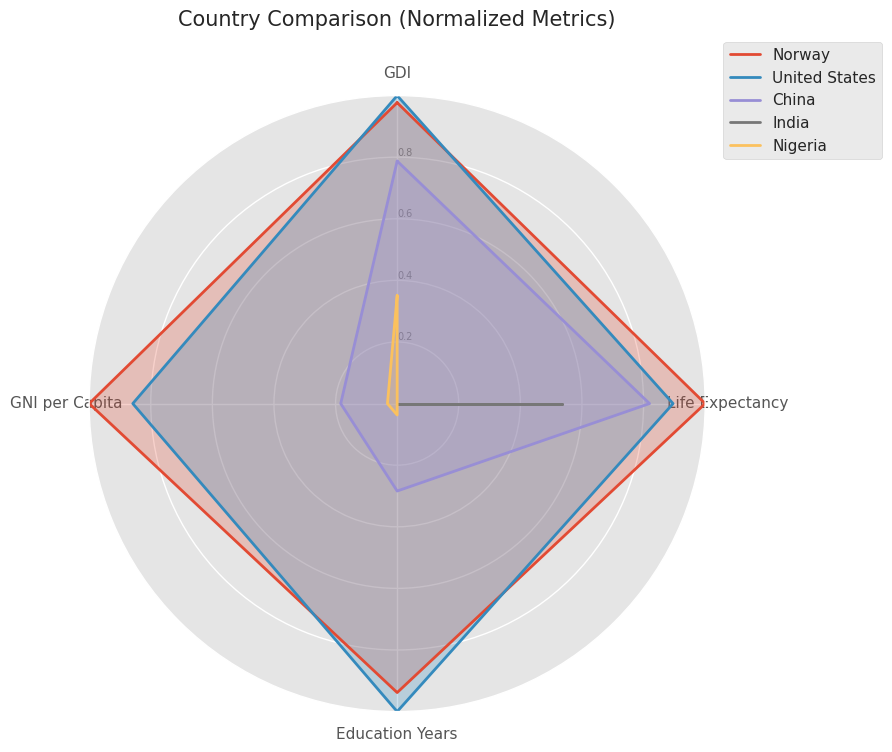

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect co

IndexError: cannot do a non-empty take from an empty axes.

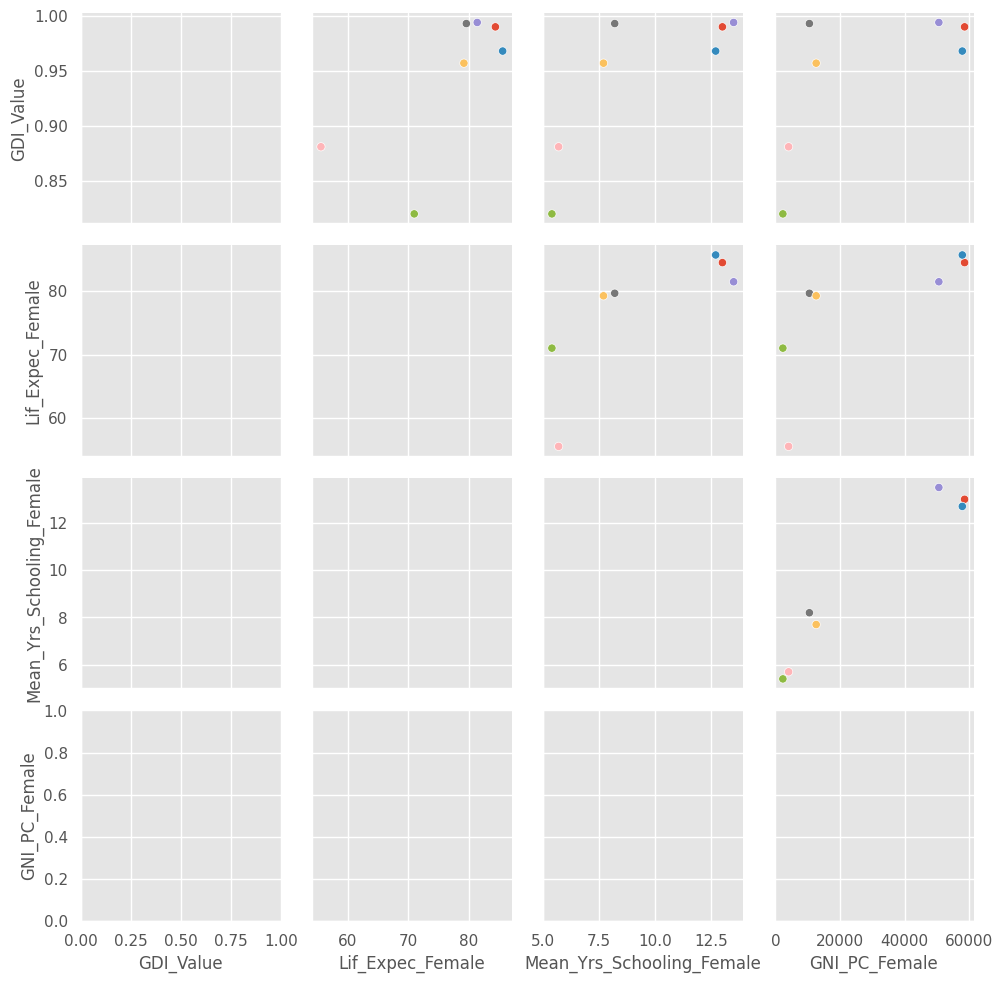

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv('GDI.csv', skiprows=[1])
df.columns = df.columns.str.strip()
df.replace('..', np.nan, inplace=True)

# Convert numerical columns
numeric_cols = ['GDI_Value', 'HDI_Female', 'HDI_Male', 'Lif_Expec_Female', 'Lif_Excep_Male',
                'Excep_Yrs_Schooling_Female', 'Excep_Yrs_Schooling_Male',
                'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Clean GNI columns
df['GNI_PC_Female'] = df['GNI_PC_Female'].str.replace(',', '').astype(float)
df['GNI_PC_Male'] = df['GNI_PC_Male'].str.replace(',', '').astype(float)
df['GNI_Ratio'] = df['GNI_PC_Female'] / df['GNI_PC_Male']

# Define regions
regions = {
    'Northern Europe': ['Norway', 'Sweden', 'Finland', 'Denmark', 'Iceland', 'Ireland'],
    'Western Europe': ['Switzerland', 'Germany', 'France', 'Netherlands', 'Belgium', 'Austria'],
    'Southern Europe': ['Italy', 'Spain', 'Portugal', 'Greece'],
    'Eastern Europe': ['Poland', 'Romania', 'Hungary', 'Czechia', 'Slovakia'],
    'North America': ['United States', 'Canada'],
    'Oceania': ['Australia', 'New Zealand'],
    'East Asia': ['Japan', 'Korea (Republic of)', 'China', 'Hong Kong'],
    'Middle East': ['Saudi Arabia', 'United Arab Emirates', 'Israel', 'Turkey'],
    'Latin America': ['Brazil', 'Argentina', 'Mexico', 'Chile', 'Colombia'],
    'South Asia': ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka'],
    'Sub-Saharan Africa': ['South Africa', 'Nigeria', 'Kenya', 'Ghana']
}

# Create region column with more robust matching
def assign_region(country):
    for region, countries in regions.items():
        if any(c in country for c in countries):
            return region
    return None

df['Region'] = df['Country'].apply(assign_region)
regional_df = df.dropna(subset=['Region'])

# Visualization 1: GDI by Region
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='GDI_Value', data=regional_df)
plt.title('GDI Value Distribution by Region')
plt.xlabel('Region')
plt.ylabel('GDI Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Top Countries by Region
top_countries_by_region = regional_df.groupby('Region').apply(
    lambda x: x.nlargest(3, 'GDI_Value')).reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='GDI_Value', y='Country', hue='Region',
            data=top_countries_by_region, dodge=False)
plt.title('Top 3 Countries by GDI Value from Each Region')
plt.xlabel('GDI Value')
plt.ylabel('Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization 3: Gender Gaps
regional_means = regional_df.groupby('Region')[
    ['Lif_Expec_Female', 'Lif_Excep_Male',
     'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male',
     'GNI_PC_Female', 'GNI_PC_Male']].mean()

regional_means['Life_Exp_Diff'] = regional_means['Lif_Expec_Female'] - regional_means['Lif_Excep_Male']
regional_means['Education_Diff'] = regional_means['Mean_Yrs_Schooling_Female'] - regional_means['Mean_Yrs_Schooling_Male']
regional_means['GNI_Ratio'] = regional_means['GNI_PC_Female'] / regional_means['GNI_PC_Male']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(x='Life_Exp_Diff', y=regional_means.index, data=regional_means.reset_index(), ax=axes[0])
axes[0].set_title('Female - Male Life Expectancy Difference')
axes[0].set_xlabel('Years Difference (F-M)')

sns.barplot(x='Education_Diff', y=regional_means.index, data=regional_means.reset_index(), ax=axes[1])
axes[1].set_title('Female - Male Education Years Difference')
axes[1].set_xlabel('Years Difference (F-M)')

sns.barplot(x='GNI_Ratio', y=regional_means.index, data=regional_means.reset_index(), ax=axes[2])
axes[2].set_title('GNI Ratio (Female/Male)')
axes[2].set_xlabel('GNI Ratio')
axes[2].axvline(x=1, color='red', linestyle='--')

plt.tight_layout()
plt.show()

# Visualization 4: Radar Chart
def create_radar_chart(countries):
    categories = ['GDI_Value', 'Lif_Expec_Female', 'Mean_Yrs_Schooling_Female', 'GNI_PC_Female']
    labels = ['GDI', 'Life Expectancy', 'Education Years', 'GNI per Capita']

    plot_df = df[df['Country'].isin(countries)][['Country'] + categories].set_index('Country')
    plot_df = (plot_df - plot_df.min()) / (plot_df.max() - plot_df.min())

    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for country in countries:
        values = plot_df.loc[country].values.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=country)
        ax.fill(angles, values, alpha=0.25)

    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)

    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
    ax.set_ylim(0, 1)

    plt.title('Country Comparison (Normalized Metrics)', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

create_radar_chart(['Norway', 'United States', 'China', 'India', 'Nigeria'])

# Visualization 5: Scatterplot Matrix
selected_countries = ['Norway', 'Switzerland', 'United States', 'China', 'India', 'Nigeria', 'Brazil']
selected_df = df[df['Country'].isin(selected_countries)]

g = sns.PairGrid(selected_df,
                 vars=['GDI_Value', 'Lif_Expec_Female', 'Mean_Yrs_Schooling_Female', 'GNI_PC_Female'],
                 hue='Country', height=2.5)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
g.add_legend()
plt.suptitle('Scatterplot Matrix for Selected Countries', y=1.02)
plt.show()